<a href="https://colab.research.google.com/github/aslater-mc/aslater---DATA-110-22016/blob/main/Project1/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Using Data to Calculate Happiness
*Or how emotion meets logic in analyzing the world’s happiness in 2020*


# Using Data to Analyze World Happiness.
To conduct today’s analysis we will be using a dataset that calculates a happiness score from one-hundred and fifty three countries. In using this data I hope that I can answer the one question I have in regards to societal happiness; What makes a country happy?

Citation
Londeen, M., Jhon, H., Layard, R., & De Neve, J.-E. (2020). World Happiness Report 2020. https://www.kaggle.com/datasets/londeen/world-happiness-report-2020



# Our Analysis Goals:


*   What is our maximum?

What will be the country with the highest score? What factors contributes to its high score?

* What is our minimum?

What factors are correlated with high or low life expectancy within a country?


*   Life Expectancy Factors?

What factors are correlated with high or low life expectancy within a country?

* What role does GDP play?

How does a country’s GDP play in its overall quality?

* Common trends?

What trends are associated with a higher happiness score, or lower happiness score?





In [2]:
!pip install joypy

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from joypy import joyplot

In [7]:
df = pd.read_csv('https://raw.githubusercontent.com/aslater-mc/aslater---DATA-110-22016/refs/heads/main/Project1/happiness2020.csv')


In [8]:
df.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559        0.974670                73.000000   
4              11.087804        0.952487                73.200783   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.949172   -0.059482                   0.195445   
1                      0.951444    0.066202                   0.168489   
2                      0.921337    0.105911                   0.303728   
3                      0.948892    0.246944                   0.711710   
4                      0.955750    0.134533                   0.263218   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                  1.972317                          1.285190   
1                  1.972317                          1.326949   
2                  1.972317                          1.390774   
3                  1.972317                          1.326502   
4                  1.972317                          1.424207   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.499526                               0.961271   
1                      1.503449                               0.979333   
2                      1.472403                               1.040533   
3                      1.547567                               1.000843   
4                      1.495173                               1.008072   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.662317                  0.159670   
1                                    0.665040                  0.242793   
2                                    0.628954                  0.269056   
3                                    0.661981                  0.362330   
4                                    0.670201                  0.287985   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                 0.477857             2.762835  
1                                 0.495260             2.432741  
2                                 0.407946             2.350267  
3                                 0.144541             2.460688  
4                                 0.434101             2.168266

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 20 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country name                                153 non-null    object 
 1   Regional indicator                          153 non-null    object 
 2   Ladder score                                153 non-null    float64
 3   Standard error of ladder score              153 non-null    float64
 4   upperwhisker                                153 non-null    float64
 5   lowerwhisker                                153 non-null    float64
 6   Logged GDP per capita                       153 non-null    float64
 7   Social support                              153 non-null    float64
 8   Healthy life expectancy                     153 non-null    float64
 9   Freedom to make life choices                153 non-null    float64
 10  Generosity    

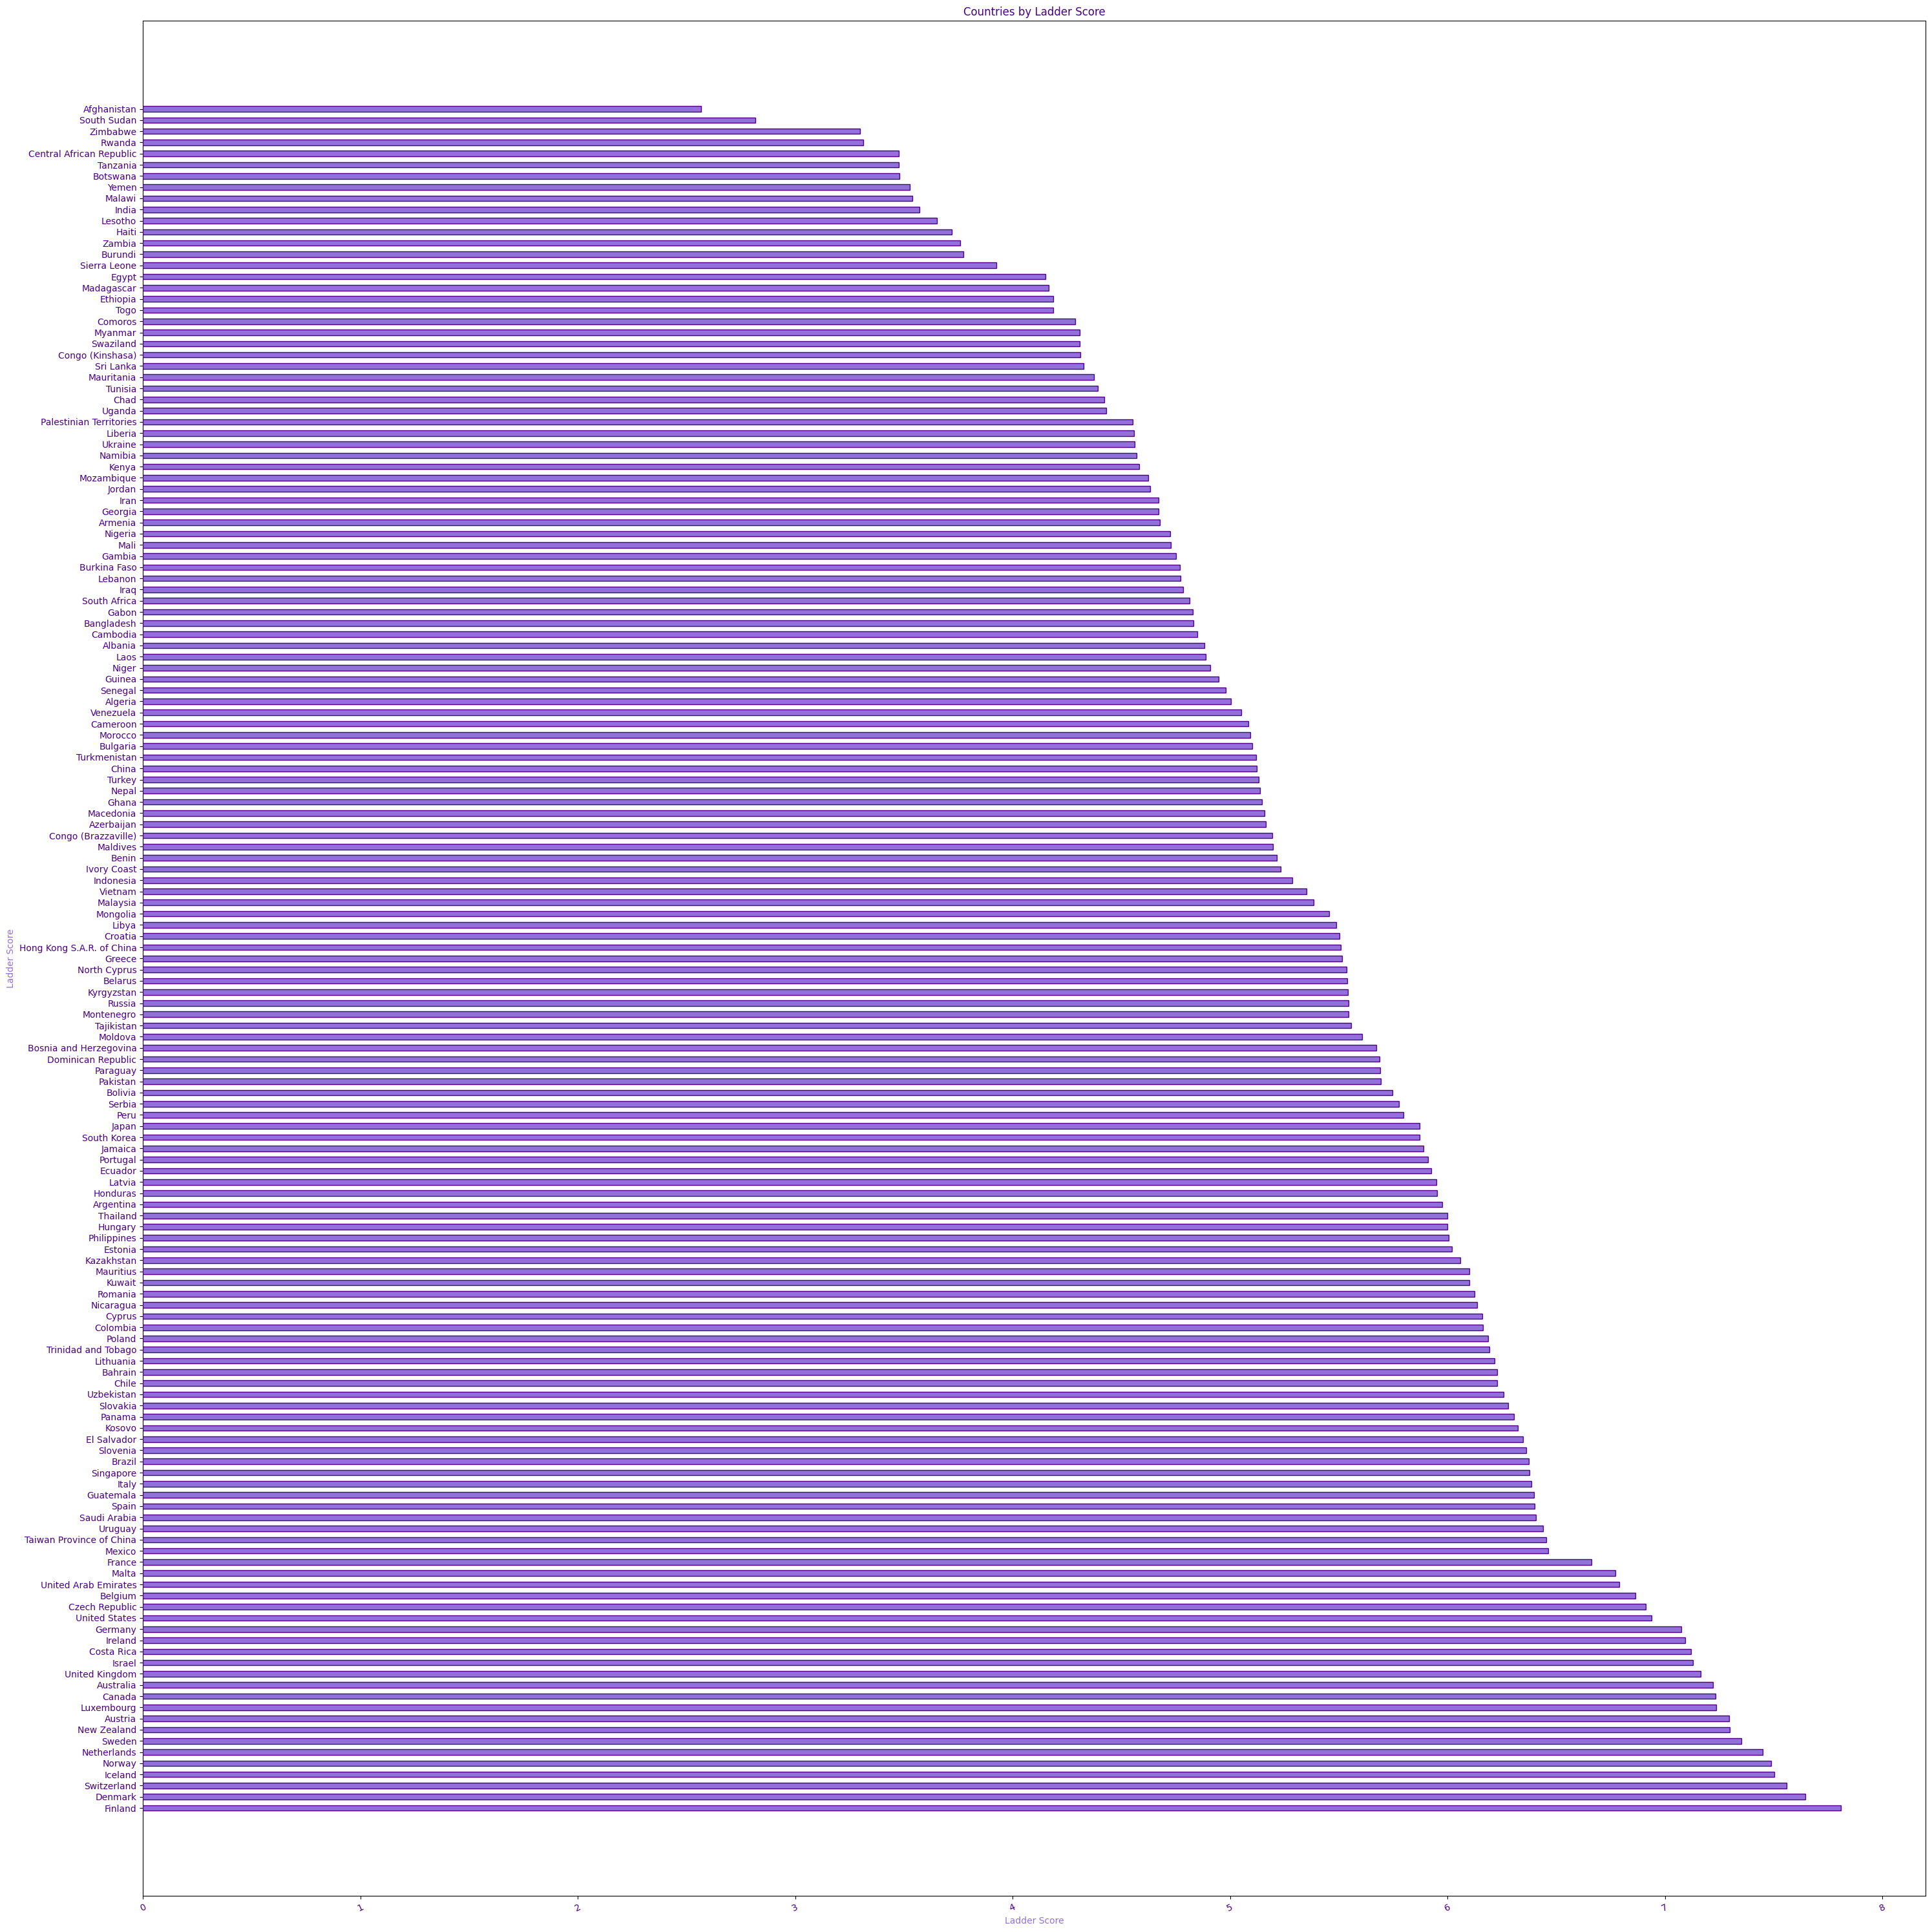

In [10]:
x=(df['Country name'])
y=(df['Ladder score'])
plt.figure(figsize=(30,30))
plt.barh(x,y,color='mediumpurple', edgecolor='indigo', zorder=10, height=-0.5)
plt.ylabel('Ladder Score', color='mediumpurple')
plt.xlabel('Ladder Score', color='mediumpurple')
plt.xticks(color='indigo', rotation=25)
plt.yticks(color='indigo')
plt.title('Countries by Ladder Score', color='indigo')
plt.tight_layout()
plt.show()

At a glance, you would not be able to tell what exactly this chart is trying to tell you, yes you could gather that it’s listing things at a value from least to greatest, but because of the size of the dataset, it is best we simplify and zero in on specifics.
[link text](https://)

In [11]:
ds=df.sort_values(by='Ladder score', ascending=False)
ds_top_10=ds.tail(10)
ds_top_10.tail()

Country name  Regional indicator  Ladder score  \
148  Central African Republic  Sub-Saharan Africa        3.4759   
149                    Rwanda  Sub-Saharan Africa        3.3123   
150                  Zimbabwe  Sub-Saharan Africa        3.2992   
151               South Sudan  Sub-Saharan Africa        2.8166   
152               Afghanistan          South Asia        2.5669   

     Standard error of ladder score  upperwhisker  lowerwhisker  \
148                        0.115183      3.701658      3.250141   
149                        0.052425      3.415053      3.209547   
150                        0.058674      3.414202      3.184198   
151                        0.107610      3.027516      2.605684   
152                        0.031311      2.628270      2.505530   

     Logged GDP per capita  Social support  Healthy life expectancy  \
148               6.625160        0.319460                45.200001   
149               7.600104        0.540835                61.098846   
150               7.865712        0.763093                55.617260   
151               7.425360        0.553707                51.000000   
152               7.462861        0.470367                52.590000   

     Freedom to make life choices  Generosity  Perceptions of corruption  \
148                      0.640881    0.082410                   0.891807   
149                      0.900589    0.055484                   0.183541   
150                      0.711458   -0.072064                   0.810237   
151                      0.451314    0.016519                   0.763417   
152                      0.396573   -0.096429                   0.933687   

     Ladder score in Dystopia  Explained by: Log GDP per capita  \
148                  1.972317                          0.041072   
149                  1.972317                          0.343243   
150                  1.972317                          0.425564   
151                  1.972317                          0.289083   
152                  1.972317                          0.300706   

     Explained by: Social support  Explained by: Healthy life expectancy  \
148                      0.000000                               0.000000   
149                      0.522876                               0.572383   
150                      1.047835                               0.375038   
151                      0.553279                               0.208809   
152                      0.356434                               0.266052   

     Explained by: Freedom to make life choices  Explained by: Generosity  \
148                                    0.292814                  0.253513   
149                                    0.604088                  0.235705   
150                                    0.377405                  0.151349   
151                                    0.065609                  0.209935   
152                                    0.000000                  0.135235   

     Explained by: Perceptions of corruption  Dystopia + residual  
148                                 0.028265             2.860198  
149                                 0.485542             0.548445  
150                                 0.080929             0.841031  
151                                 0.111157             1.378751  
152                                 0.001226             1.507236

In [12]:
ds=df.sort_values(by='Ladder score', ascending=False)
ds_top_10=ds.head(10)
ds_top_10.head()

Country name Regional indicator  Ladder score  \
0      Finland     Western Europe        7.8087   
1      Denmark     Western Europe        7.6456   
2  Switzerland     Western Europe        7.5599   
3      Iceland     Western Europe        7.5045   
4       Norway     Western Europe        7.4880   

   Standard error of ladder score  upperwhisker  lowerwhisker  \
0                        0.031156      7.869766      7.747634   
1                        0.033492      7.711245      7.579955   
2                        0.035014      7.628528      7.491272   
3                        0.059616      7.621347      7.387653   
4                        0.034837      7.556281      7.419719   

   Logged GDP per capita  Social support  Healthy life expectancy  \
0              10.639267        0.954330                71.900825   
1              10.774001        0.955991                72.402504   
2              10.979933        0.942847                74.102448   
3              10.772559        0.974670                73.000000   
4              11.087804        0.952487                73.200783   

   Freedom to make life choices  Generosity  Perceptions of corruption  \
0                      0.949172   -0.059482                   0.195445   
1                      0.951444    0.066202                   0.168489   
2                      0.921337    0.105911                   0.303728   
3                      0.948892    0.246944                   0.711710   
4                      0.955750    0.134533                   0.263218   

   Ladder score in Dystopia  Explained by: Log GDP per capita  \
0                  1.972317                          1.285190   
1                  1.972317                          1.326949   
2                  1.972317                          1.390774   
3                  1.972317                          1.326502   
4                  1.972317                          1.424207   

   Explained by: Social support  Explained by: Healthy life expectancy  \
0                      1.499526                               0.961271   
1                      1.503449                               0.979333   
2                      1.472403                               1.040533   
3                      1.547567                               1.000843   
4                      1.495173                               1.008072   

   Explained by: Freedom to make life choices  Explained by: Generosity  \
0                                    0.662317                  0.159670   
1                                    0.665040                  0.242793   
2                                    0.628954                  0.269056   
3                                    0.661981                  0.362330   
4                                    0.670201                  0.287985   

   Explained by: Perceptions of corruption  Dystopia + residual  
0                                 0.477857             2.762835  
1                                 0.495260             2.432741  
2                                 0.407946             2.350267  
3                                 0.144541             2.460688  
4                                 0.434101             2.168266

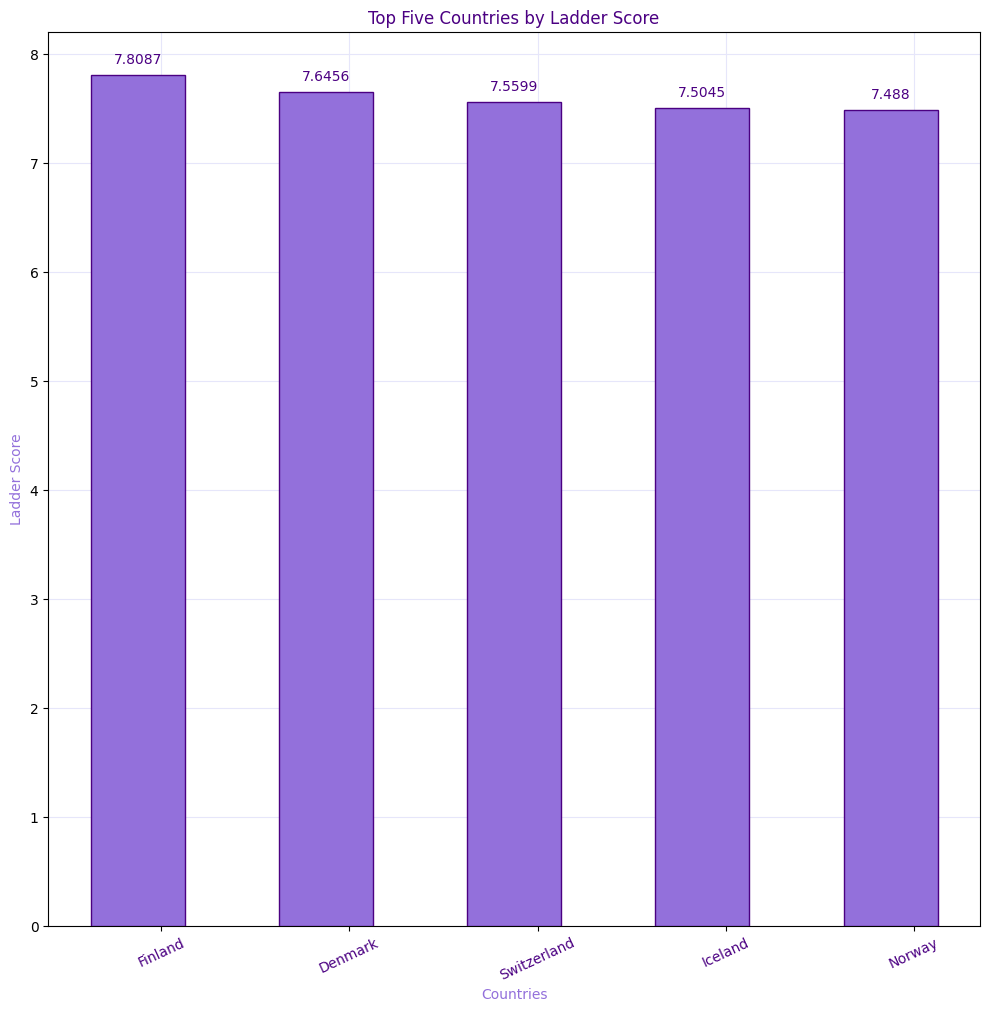

In [13]:
plt.figure(figsize=(10, 10))
x = ['Finland', 'Denmark', 'Switzerland', 'Iceland', 'Norway']
x_indexes = np.arange(len(x))
y = [7.8087, 7.6456, 7.5599, 7.5045, 7.4880]
barplot2 = plt.bar(x_indexes - 0.125, y, color='mediumpurple', edgecolor='indigo', width=0.5,zorder=10)
plt.bar_label(barplot2, labels=y, label_type='edge', color='indigo', padding=6)
plt.xticks(ticks=x_indexes, labels=x, rotation=25, color='indigo')
plt.ylabel('Ladder Score', color='mediumpurple')
plt.xlabel('Countries', color='mediumpurple')
plt.tight_layout()
plt.grid(color='lavender')
plt.title('Top Five Countries by Ladder Score', color='indigo')
plt.show()

From our data, Finland, Denmark, Switzerland, Iceland and Norway happen to have the highest scores when it comes to our Lader Score (otherwise known as our Happiness Score in this case) but it’s not just that, overall these countries score high when it comes to Logged GDP per capita Healthy Life Expectancy, and Freedom to make life Choice. These countries also happen to have the lowest perceptions of corruptions.


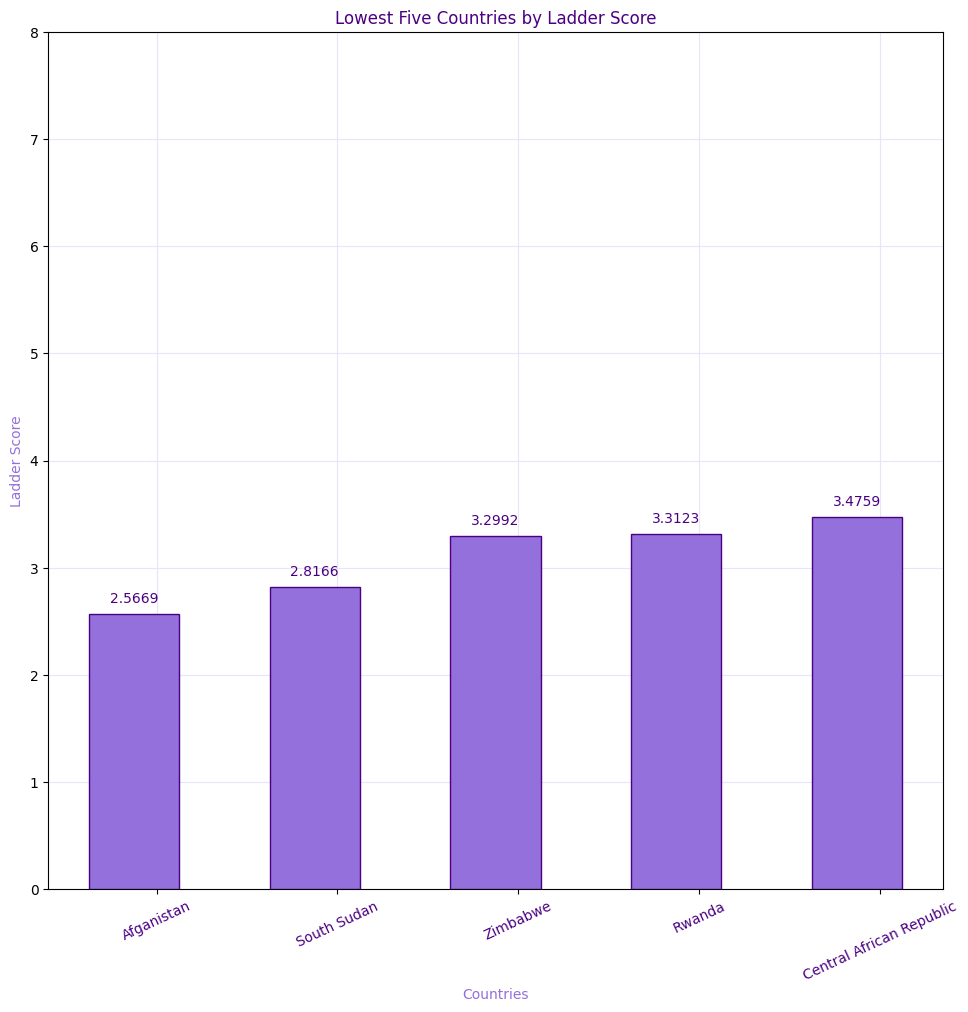

In [14]:
plt.figure(figsize=(10, 10))
x = ['Afganistan','South Sudan','Zimbabwe','Rwanda','Central African Republic']
x_indexes = np.arange(len(x))
y = [2.5669, 2.8166, 3.2992, 3.3123, 3.4759]
barplot2 = plt.bar(x_indexes - 0.125, y, color='mediumpurple', edgecolor='indigo', width=0.5,zorder=10)
plt.bar_label(barplot2, labels=y, label_type='edge', color='indigo', padding=6)
plt.xticks(ticks=x_indexes, labels=x, rotation=25, color='indigo')
plt.ylabel('Ladder Score', color='mediumpurple')
plt.xlabel('Countries', color='mediumpurple')
plt.tight_layout()
plt.grid(color='lavender')
plt.title('Lowest Five Countries by Ladder Score', color='indigo')
plt.ylim(0, 8)
plt.show()

In comparison to our happiest countries, we can see the Central African Republic, Rwanda, Zimbabwe, South Sudan, and Afghanistan on average all countries score far lower when it comes to the Ladder Score, GDP per Capita, Healthy Life Expectancy, and  Freedom to Make Life Choices.



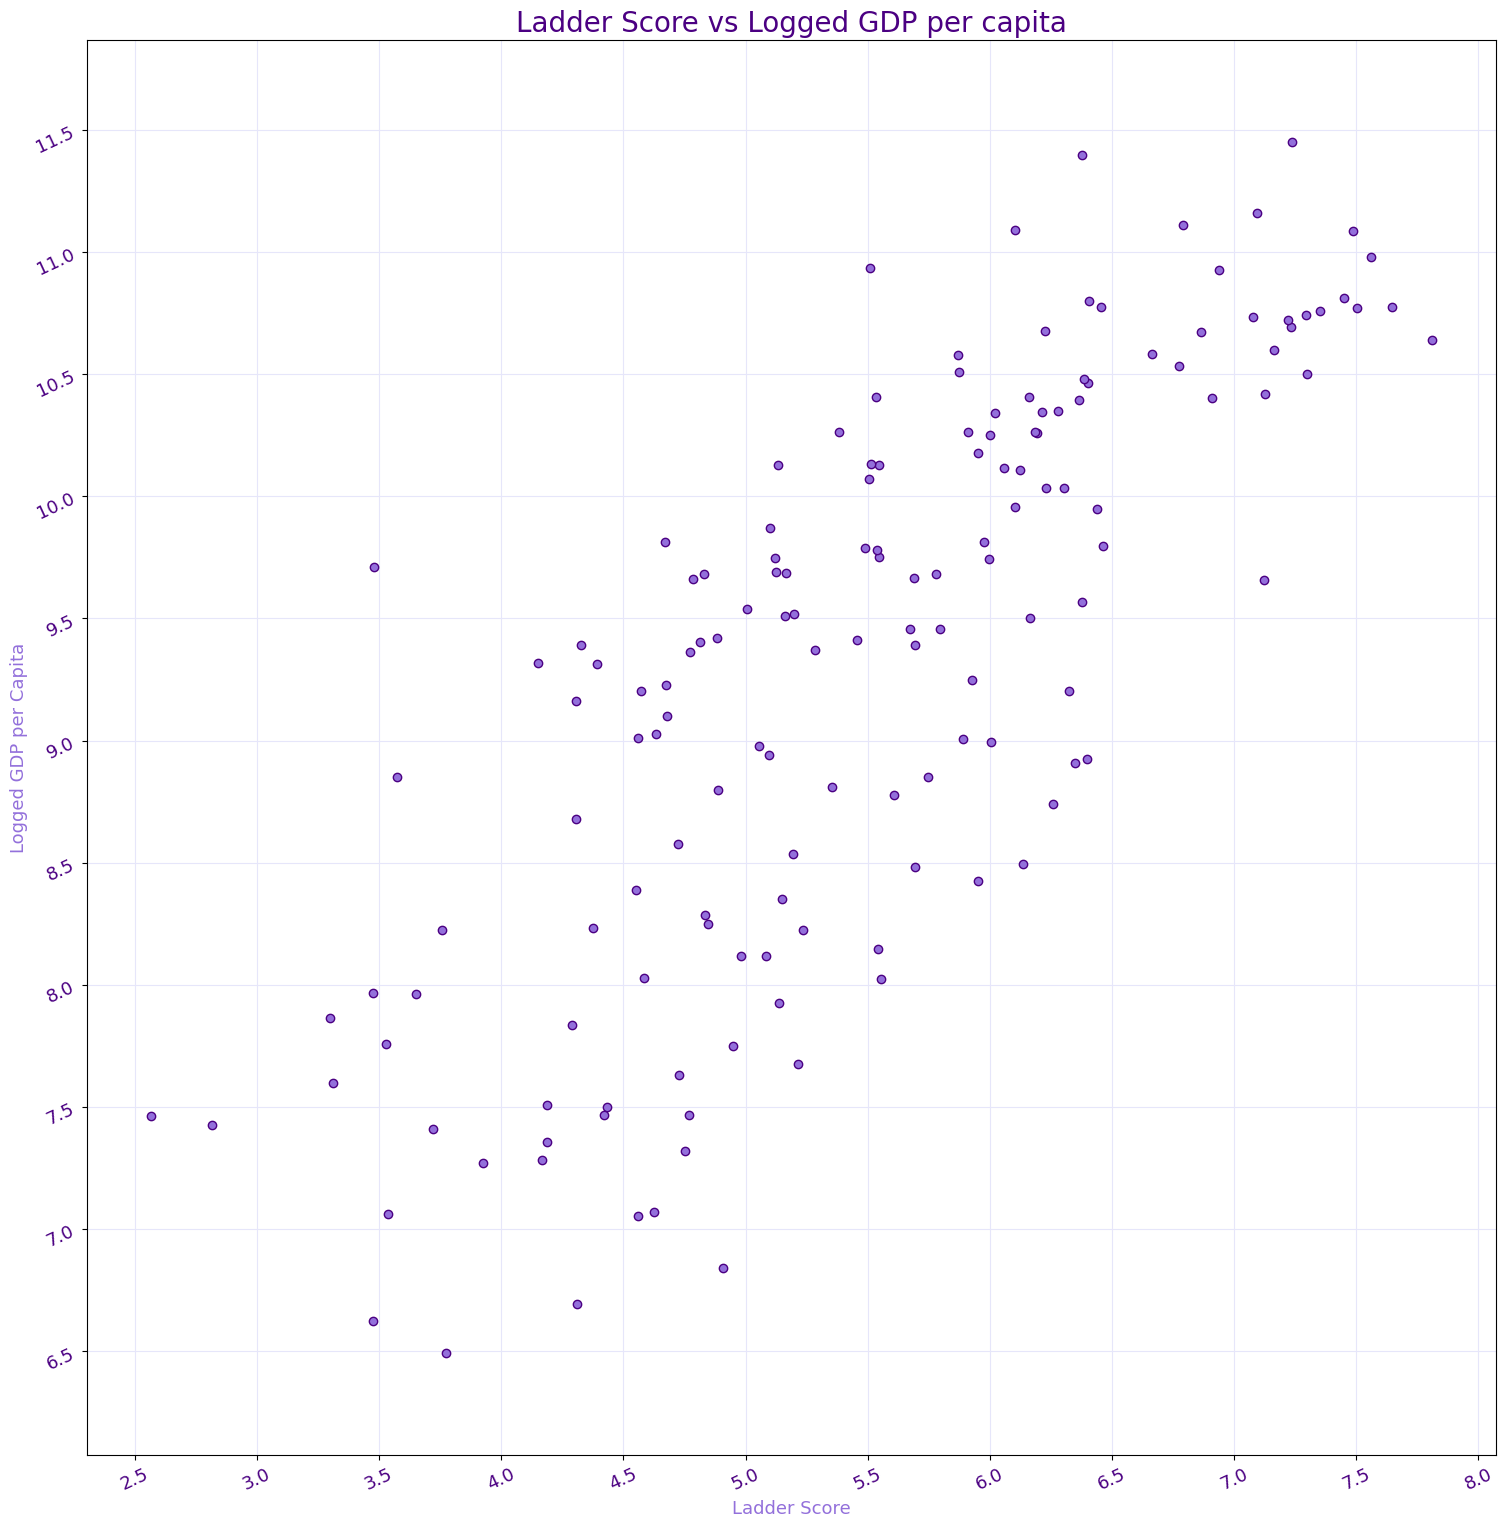

In [15]:
x=(df['Ladder score'])
y=(df['Logged GDP per capita'])
plt.figure(figsize=(15,15))
plt.scatter(x,y,color='mediumpurple', edgecolor='indigo', zorder=10)
plt.grid(color='lavender')
plt.ylabel('Logged GDP per Capita', color='mediumpurple', fontsize=13)
plt.xlabel('Ladder Score', color='mediumpurple', fontsize=13)
plt.xticks(color='indigo', rotation=25,fontsize=13)
plt.yticks(color='indigo', rotation=25,fontsize=13)
plt.tight_layout()
plt.title('Ladder Score vs Logged GDP per capita', color='indigo', fontsize=20)
plt.axis('equal')
tick_spacing = 0.5
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
plt.show()

As it is clearly shown here, there is a upward increase trend regarding Logged GDP per Capita. When a country's GDP per Capita increases, so does its Ladder Score, or in this case, its happiness score.


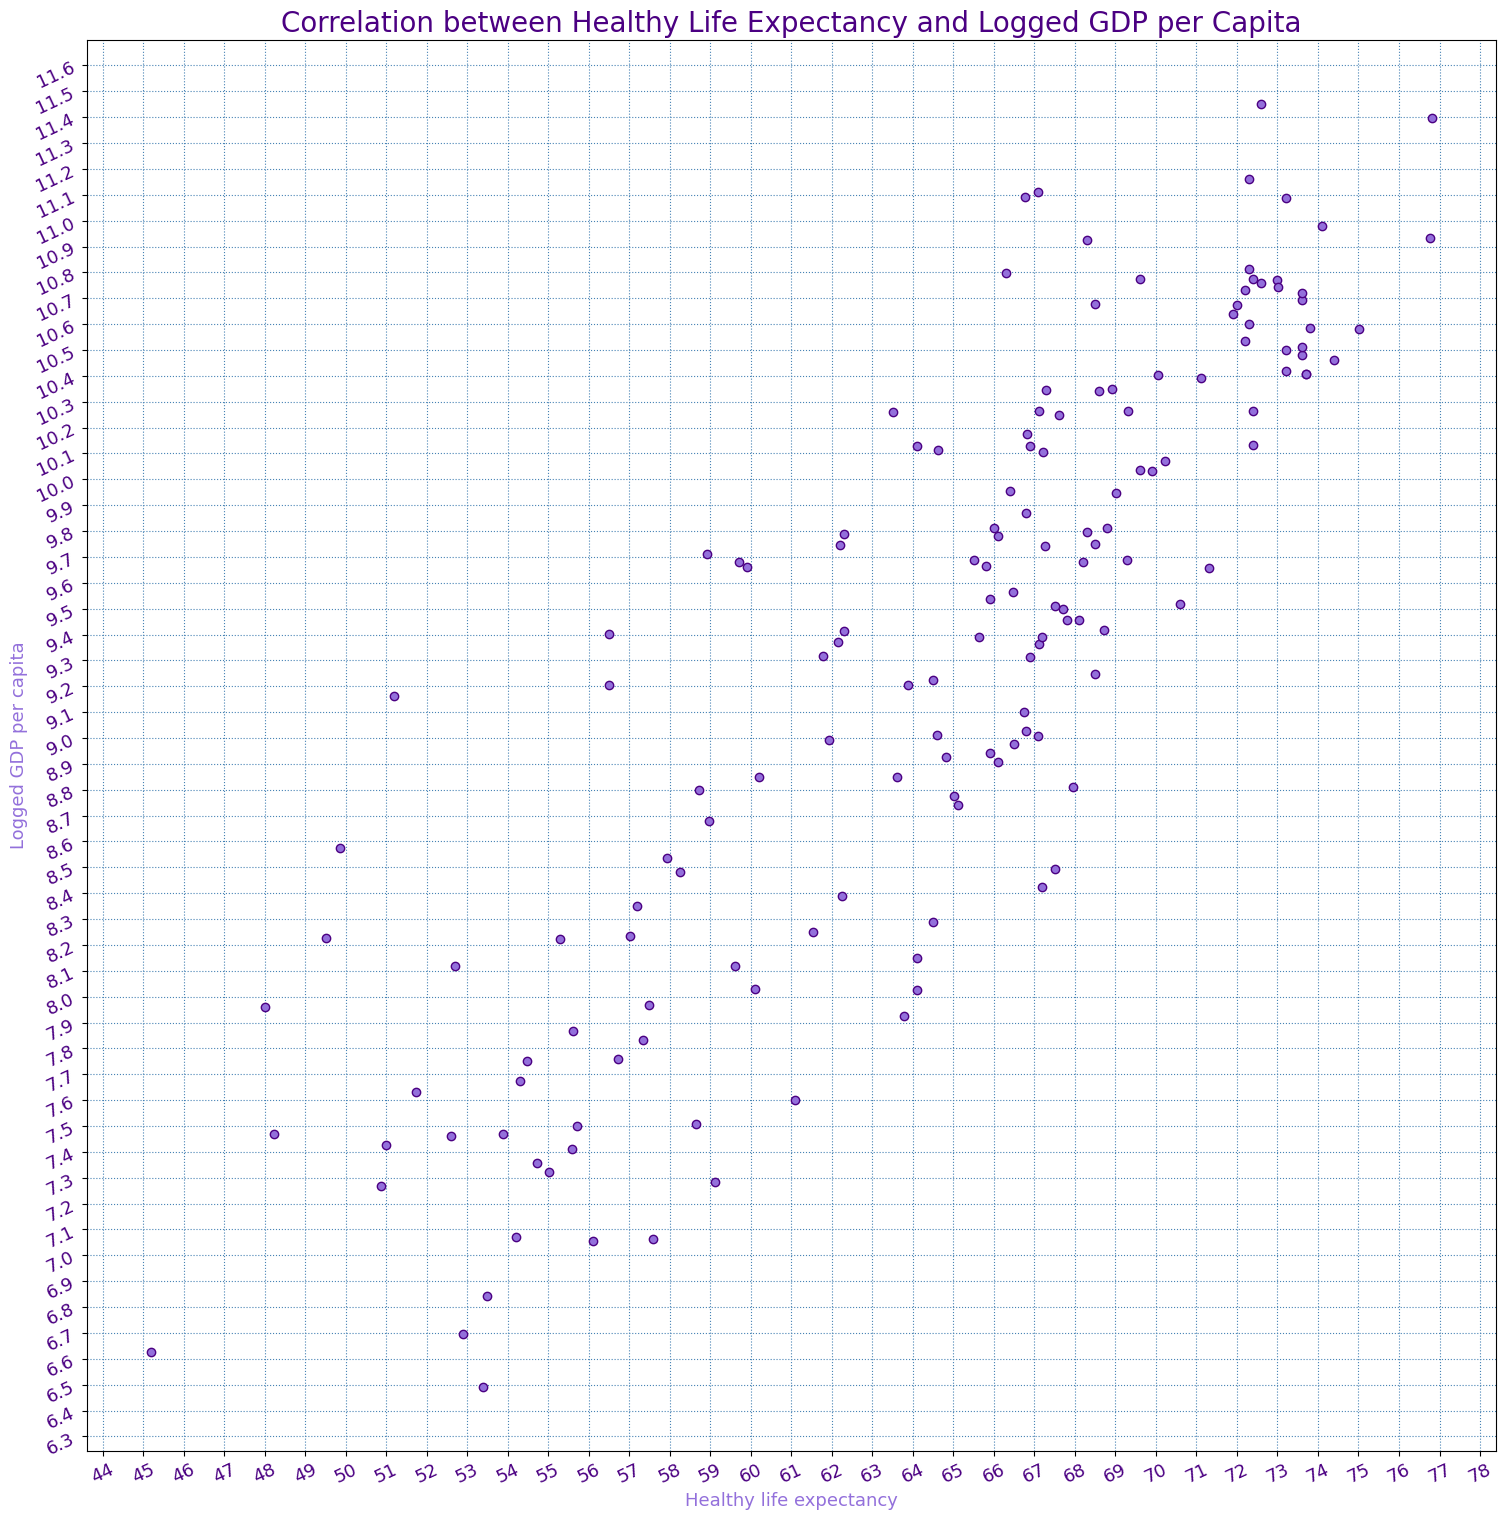

In [16]:
y=(df['Logged GDP per capita'])
x=(df['Healthy life expectancy'])
plt.figure(figsize=(15,15))
plt.scatter(x,y,color='mediumpurple', edgecolor='indigo', zorder=10)
plt.grid(color='steelblue', linestyle='dotted')
plt.ylabel('Logged GDP per Capita', color='mediumpurple', fontsize=13)
plt.xlabel('Healthy life expectancy', color='mediumpurple', fontsize=13)
plt.xticks(color='indigo', rotation=25,fontsize=13)
plt.yticks(color='indigo', rotation=25,fontsize=13)
plt.tight_layout()
plt.title('Correlation between Healthy Life Expectancy and Logged GDP per Capita', color='indigo', fontsize=20)
tick_spacing = 1
tick_spacingy = 0.1
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))
plt.show()

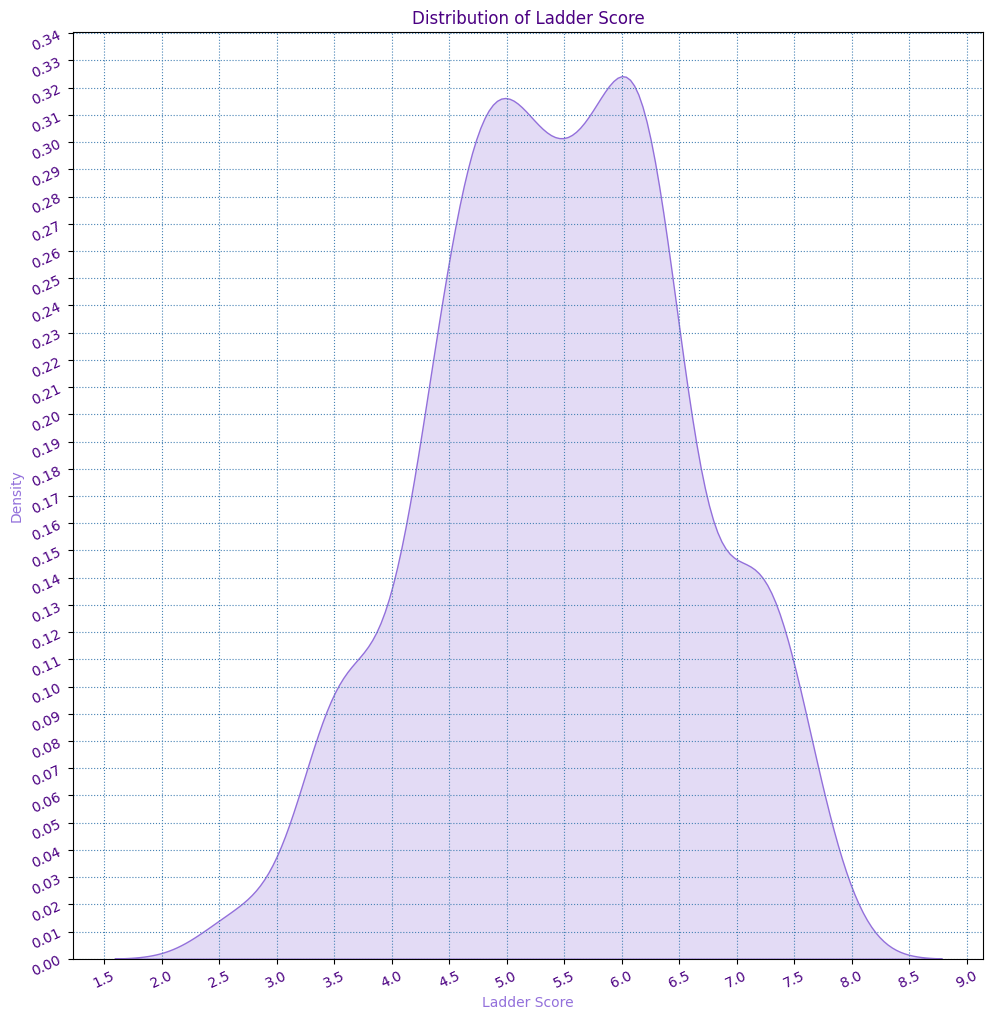

In [17]:
plt.figure(figsize=(10, 10))
sns.kdeplot(df['Ladder score'], fill=True, color='mediumpurple',  bw_adjust=0.8)
plt.grid(color='steelblue', linestyle='dotted')
plt.ylabel('Density', color='mediumpurple')
plt.xlabel('Ladder Score', color='mediumpurple')
plt.tight_layout()
plt.xticks(color='indigo', rotation=25,fontsize=10)
plt.yticks(color='indigo', rotation=25,fontsize=10)
tick_spacing = 0.5
tick_spacingy = 0.01
plt.gca().xaxis.set_major_locator(plt.MultipleLocator(tick_spacing))
plt.gca().yaxis.set_major_locator(plt.MultipleLocator(tick_spacingy))
plt.title('Distribution of Ladder Score', color='indigo')
plt.show()

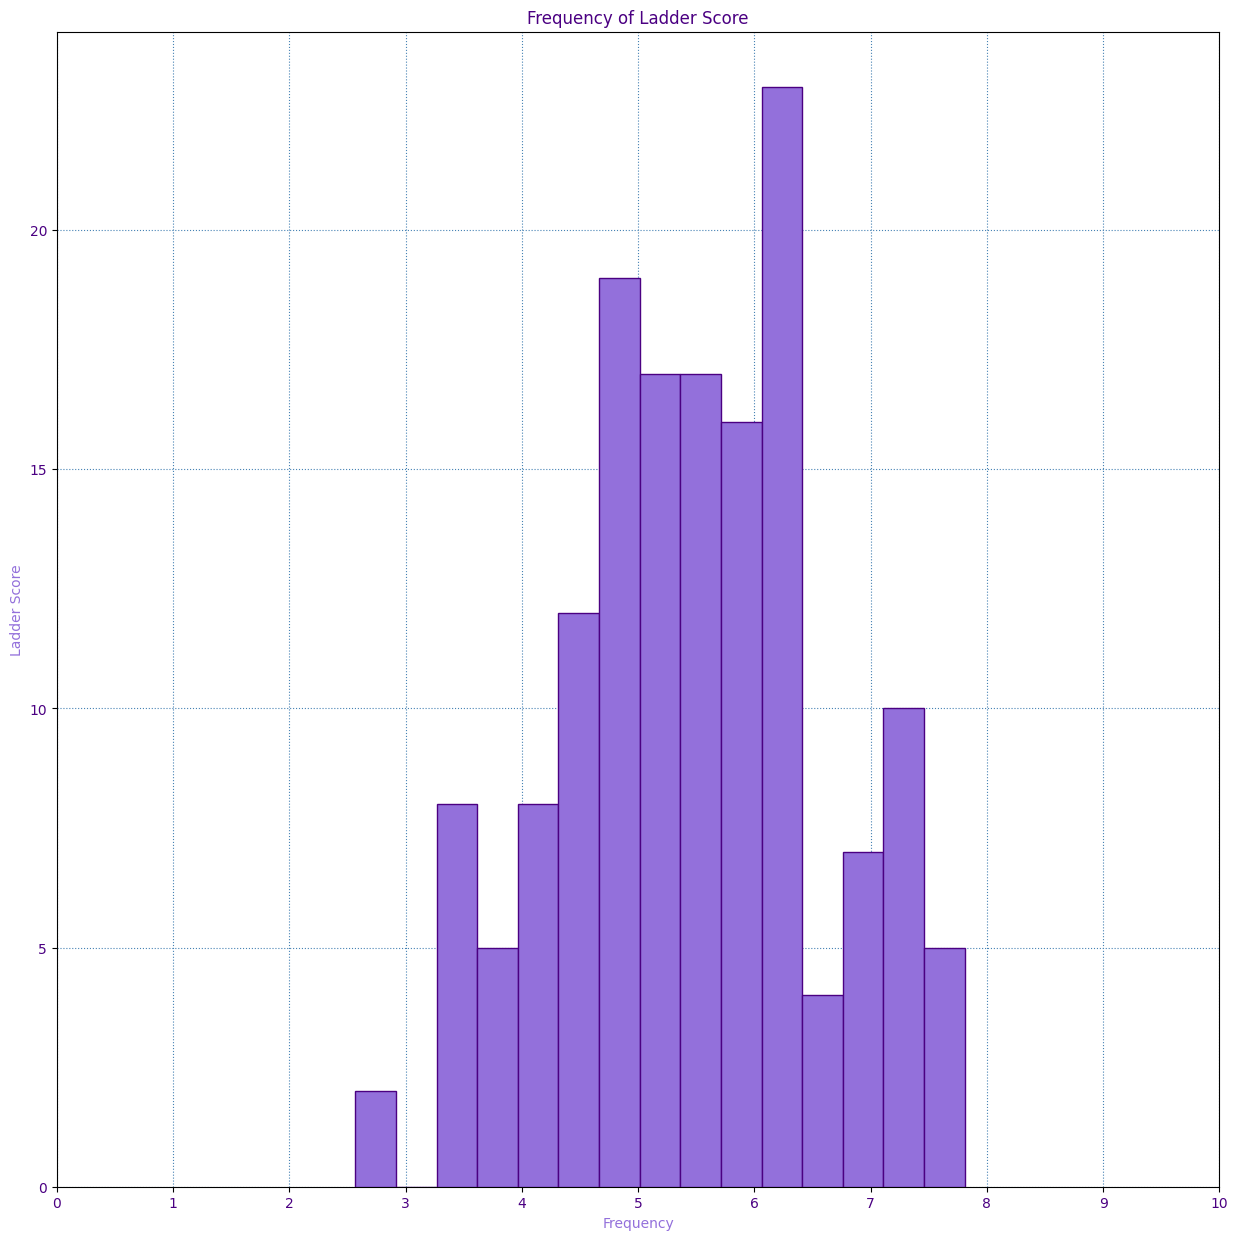

In [18]:
plt.figure(figsize=(15, 15))
plt.hist(df['Ladder score'], bins=15, color='mediumpurple', edgecolor='indigo', zorder=3)
xticks=np.arange(0,11,1)
plt.xticks(xticks, color='indigo')
plt.yticks(color='indigo')
plt.grid(color='steelblue', linestyle='dotted')
plt.ylabel('Ladder Score', color='mediumpurple')
plt.xlabel('Frequency', color='mediumpurple')
plt.title('Frequency of Ladder Score', color='indigo')
plt.show()

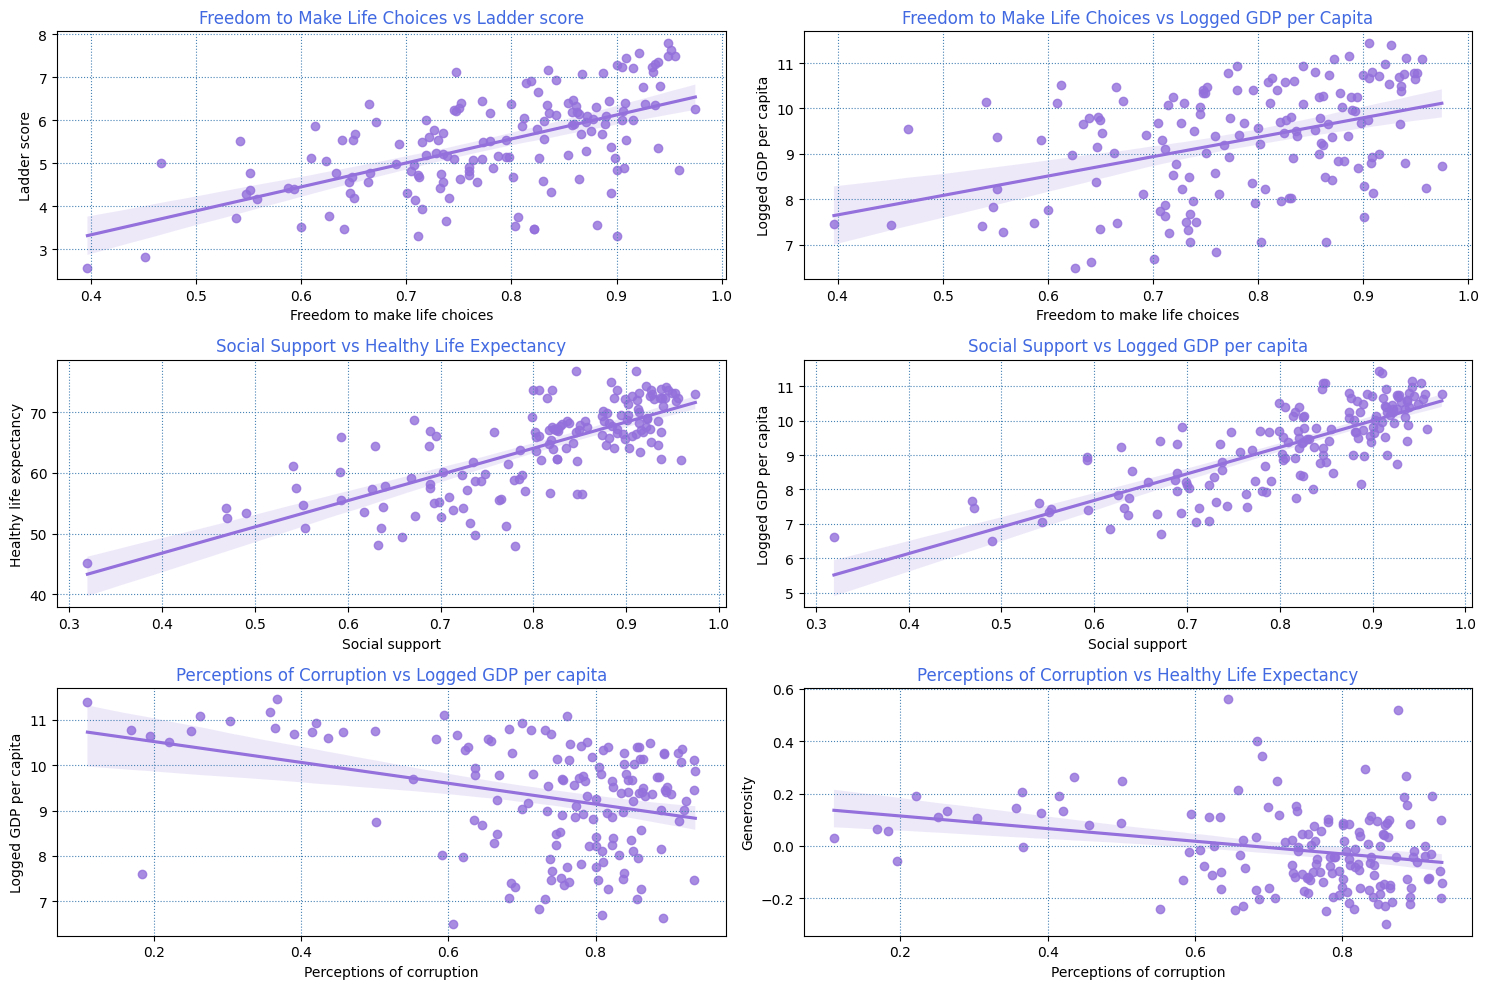

In [19]:
#Small Trends

fig, axes = plt.subplots(3,2, figsize=(15, 10), )
axes[0,0].set_title('Freedom to Make Life Choices vs Ladder score', color='royalblue')
sns.regplot(x='Freedom to make life choices', y='Ladder score', data=df, ax=axes[0,0], color='mediumpurple')
axes[0, 0].grid(True, color='steelblue', linestyle='dotted', zorder=0)


axes[0,1].set_title('Freedom to Make Life Choices vs Logged GDP per Capita', color='royalblue')
sns.regplot(x='Freedom to make life choices', y='Logged GDP per capita', data=df, ax=axes[0,1], color='mediumpurple')
axes[0, 1].grid(True, color='steelblue', linestyle='dotted', zorder=0)

axes[1,0].set_title('Social Support vs Healthy Life Expectancy', color='royalblue')
sns.regplot(x='Social support', y='Healthy life expectancy', data=df, ax=axes[1,0], color='mediumpurple')
axes[1, 0].grid(True, color='steelblue', linestyle='dotted', zorder=0)

axes[1,1].set_title('Social Support vs Logged GDP per capita', color='royalblue')
sns.regplot(x='Social support', y='Logged GDP per capita', data=df, ax=axes[1,1], color='mediumpurple')
axes[1, 1].grid(True, color='steelblue', linestyle='dotted', zorder=0)

axes[2,0].set_title('Perceptions of Corruption vs Logged GDP per capita', color='royalblue')
sns.regplot(x='Perceptions of corruption', y='Logged GDP per capita', data=df, ax=axes[2,0], color='mediumpurple')
axes[2, 0].grid(True, color='steelblue', linestyle='dotted', zorder=0)

axes[2,1].set_title('Perceptions of Corruption vs Healthy Life Expectancy', color='royalblue')
sns.regplot(x='Perceptions of corruption', y='Generosity', data=df, ax=axes[2,1], color='mediumpurple')
axes[2, 1].grid(True, color='steelblue', linestyle='dotted', zorder=0)




plt.tight_layout()
plt.show()



# Conclusion and Closing Statements
In order for a country to be truly happy, there must be a consistent incline in

* Social Support
* GPD per Capita
* Healthy Life Expectancy
* Freedom of Choice

So long as these four things are positively trending, it will result in a positive ladder score.


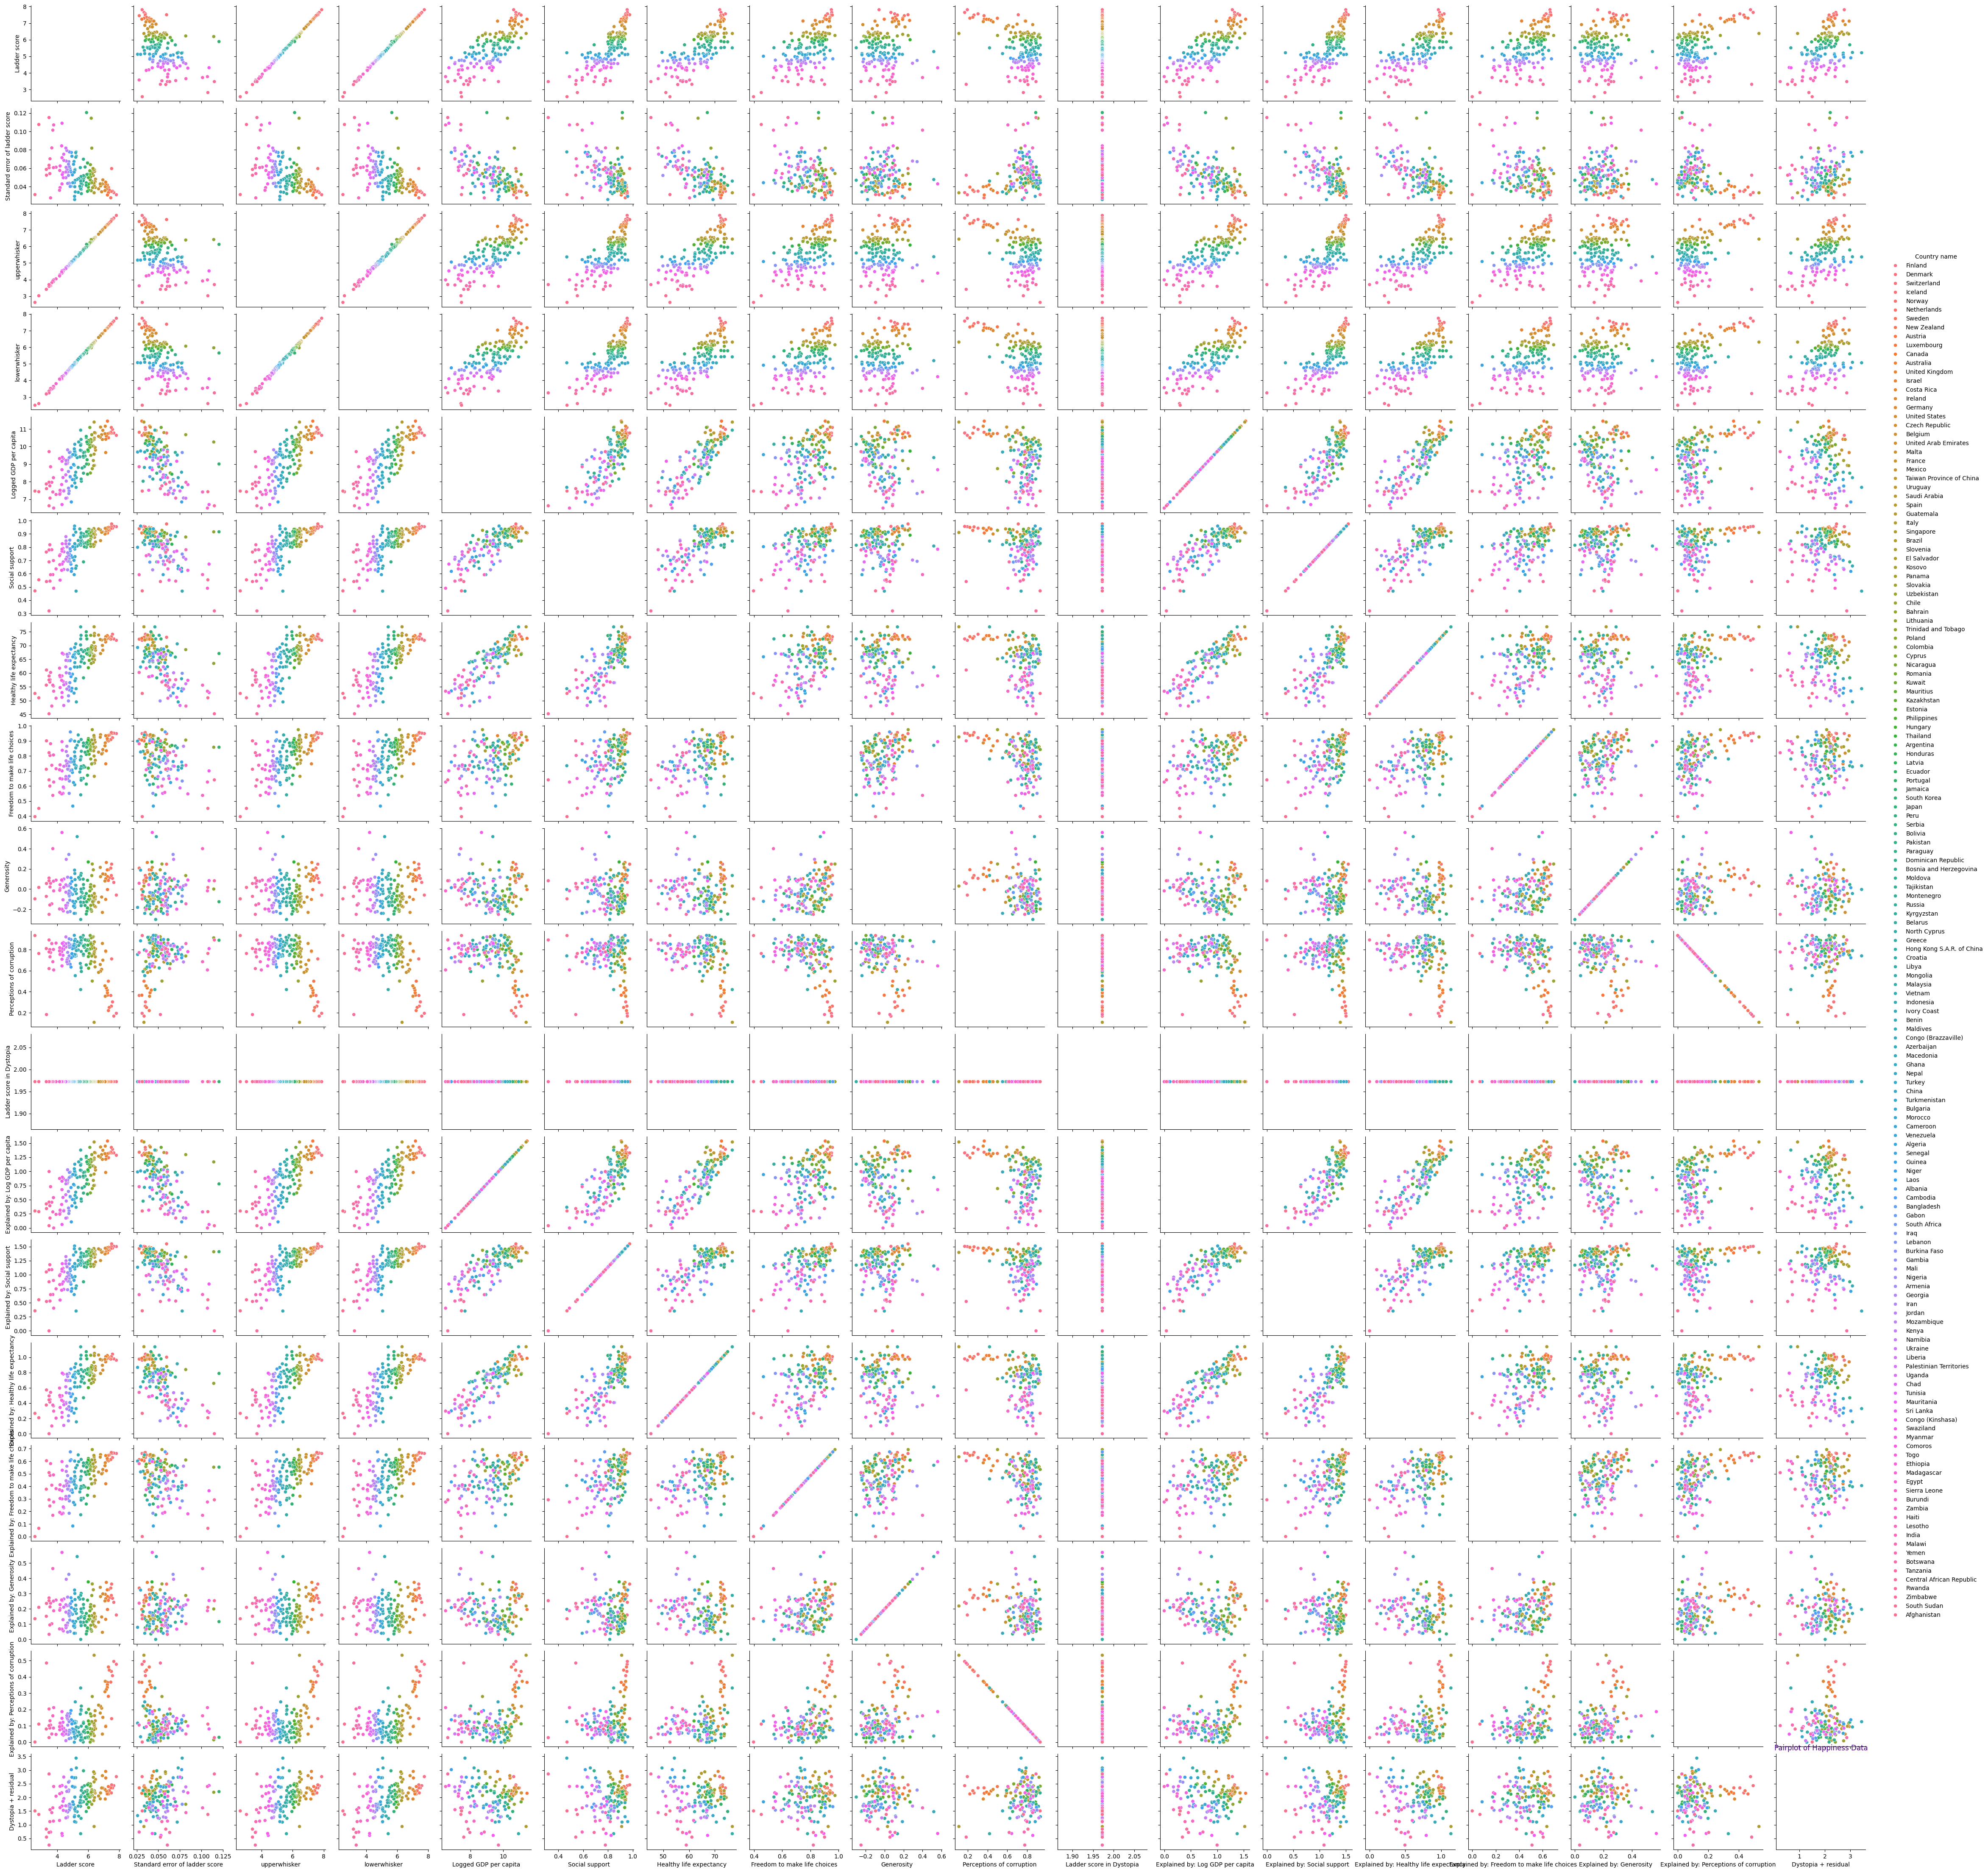

In [20]:
sns.pairplot(df, hue='Country name', kind='scatter', diag_kind='kde')
plt.title('Pairplot of Happiness Data', color='indigo')
plt.show()

In [ ]:
#I actually have no reason for this to be here, I just thought it was super duper cool!